In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os


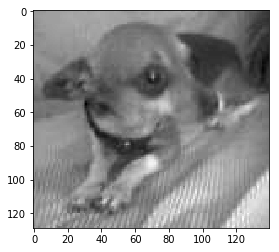

In [4]:
datadir="/home/ai-9/Documents/kagglecatsanddogs_3367a(1)/PetImages"
categories=["Dog","Cat"]
for i in categories:
    path=os.path.join(datadir,i)
    for image in os.listdir(path) :
        image_array=cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
        plt.imshow(image_array,cmap="gray")
        plt.show()
        break
    break    

In [5]:
print(image_array)

[[ 94  94  94 ...  52  51  50]
 [ 95  95  95 ...  50  48  47]
 [ 95  95  96 ...  49  48  47]
 ...
 [ 88  97 101 ... 111 111 110]
 [ 85  95  98 ... 109 109 110]
 [ 88  99  94 ... 108 106 109]]


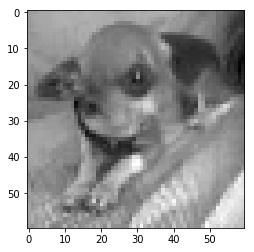

In [7]:
new_array=cv2.resize(image_array,(60,60))
plt.imshow(new_array,cmap="gray")
plt.show()

In [11]:
training_data=[]
def creat_training_data():
    for i in categories:
        path=os.path.join(datadir,i)
        class_num=categories.index(i)
        for image in os.listdir(path) :
            try:
                image_array=cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(image_array,(60,60))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

creat_training_data()        

In [12]:
print(len(training_data))

24946


In [21]:
import random 
random.shuffle(training_data)

In [26]:
x=[]
y=[]
    

In [28]:
for features,label in training_data:
    x.append(features)
    y.append(label)
X=np.array(x).reshape(-1,60,60,1)    

In [33]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()
pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [34]:
pickle_in = open("X.pickle","rb")
X=pickle.load(pickle_in)